# Iowa Housing Prediction - Exploratory Data Analysis

In [1]:
# load relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# bring in and inspect the data
df = pd.read_csv("../data/raw/Iowa_housing_prices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
# get the shape of the dataset
df.shape

(1460, 81)

In [21]:
# Inspect the available fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
# check the datatypes of the fields
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [2]:
# check for duplicate rows
duplicate_rows = df.duplicated()
duplicate_rows.sum()

0

In [20]:
# check for missing data
columns_with_nulls = df.columns[df.isnull().any()]
df[columns_with_nulls].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Understanding All Columns

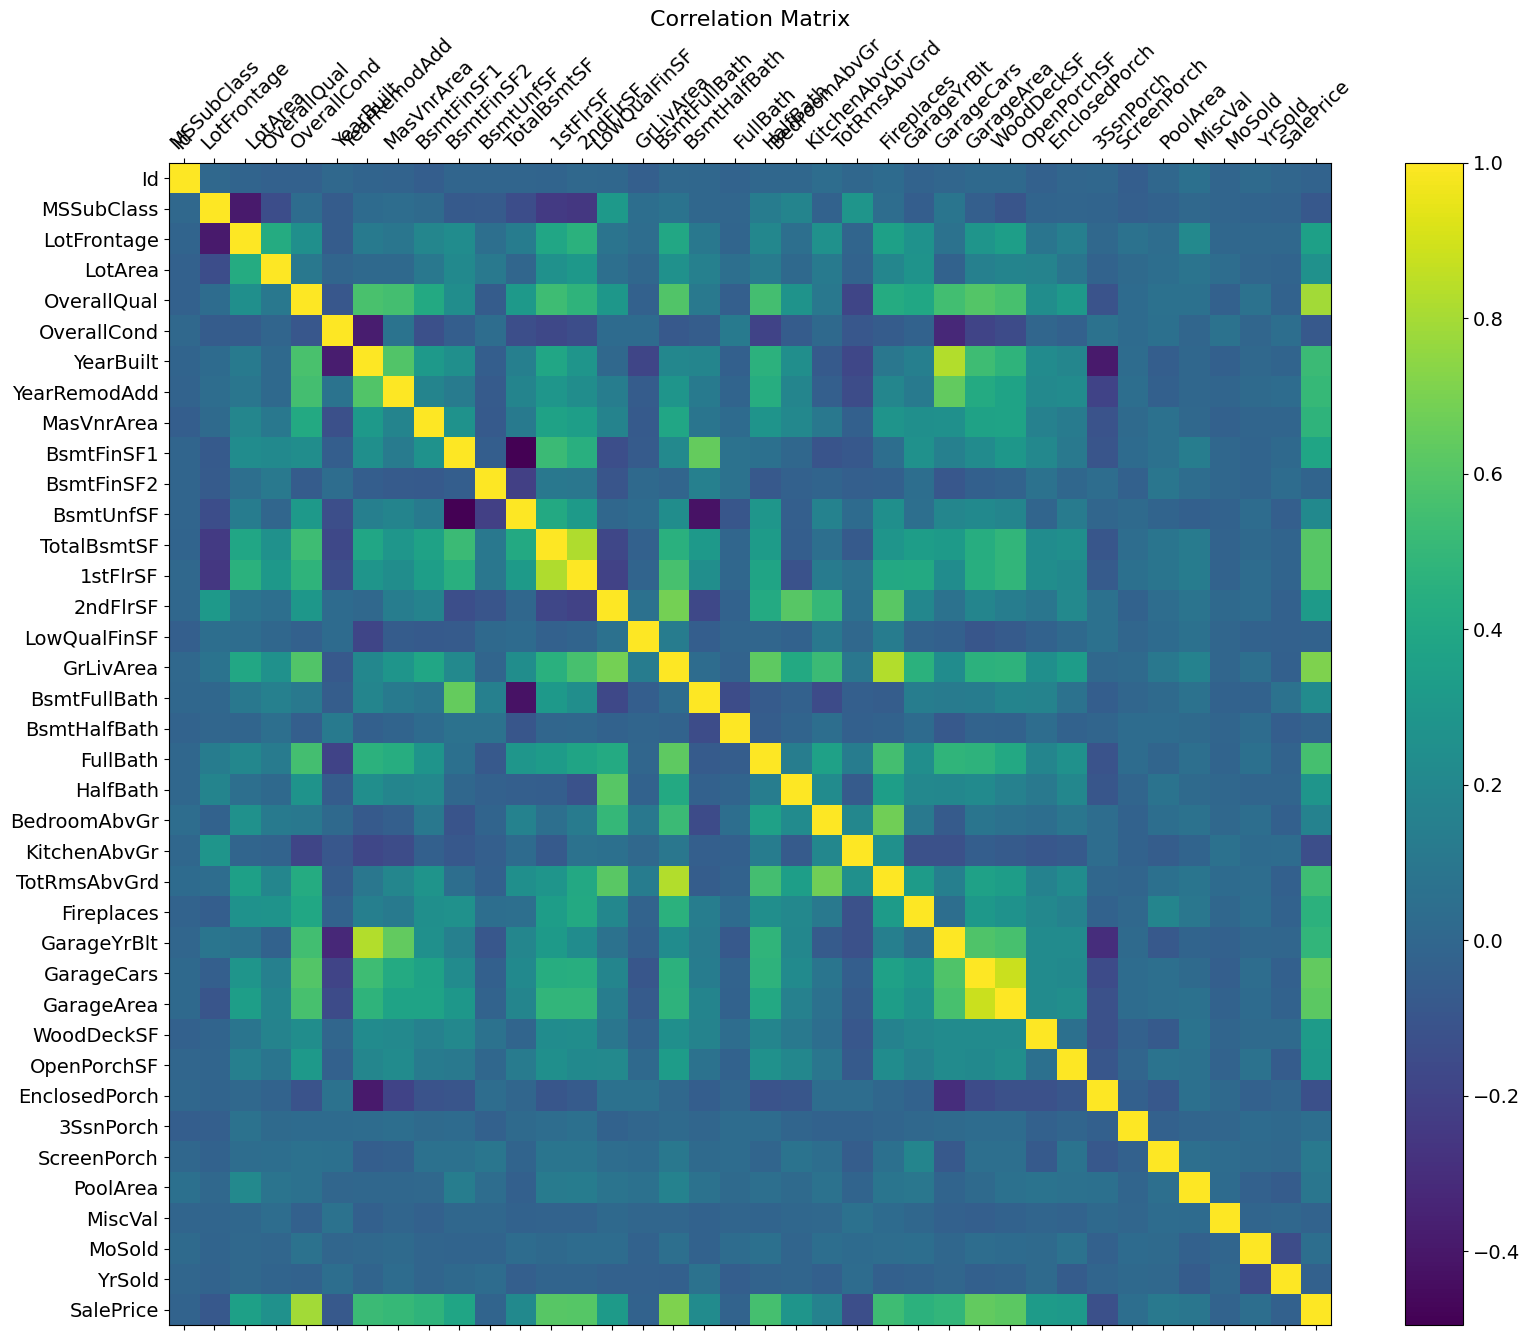

In [141]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])

# Plot correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(numeric_df.corr(), fignum=f.number)
plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=14, rotation=45)
plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [3]:
# From this correlation matrix we can see some features aren't useful to the model and will drop them due to extreme correlation with other features
# Namely: LotFrontage, OverallCond, BsmtUnfSF and EnclosedPorch'

df = df.drop(['LotFrontage', 'OverallCond', 'BsmtUnfSF', 'EnclosedPorch'], axis=1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Prune Features

In [111]:
# with the most null values, considering removing this column
df["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [35]:
df[df["MiscFeature"] == "Gar2"]

# I think a better thing to do may be to use 1 hot encoding to add 4 new columns with binary representations of the 4 misc items, they may have relevance to the model

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Gar2,Othr,Shed,TenC
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,False,False,False,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,8,2007,WD,Normal,175000,False,False,False,False
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2010,WD,Normal,210000,False,False,False,False
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,2500,5,2010,WD,Normal,266500,False,False,True,False
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,142125,False,False,False,False


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Apply cyclic encoding for months
df['month_sold_sin'] = np.sin(2 * np.pi * df['MoSold'] / 12)
df['month_sold_cos'] = np.cos(2 * np.pi * df['MoSold'] / 12)

# Combine year and month as fractions
df['year_sold_fraction'] = df['YrSold'] + (df['MoSold'] - 1) / 12

df = df.drop(['MoSold', 'YrSold'], axis=1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,month_sold_sin,month_sold_cos,year_sold_fraction
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,WD,Normal,208500,8.660254e-01,5.000000e-01,2008.083333
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,WD,Normal,181500,5.000000e-01,-8.660254e-01,2007.333333
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,WD,Normal,223500,-1.000000e+00,-1.836970e-16,2008.666667
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,WD,Abnorml,140000,8.660254e-01,5.000000e-01,2006.083333
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,WD,Normal,250000,-2.449294e-16,1.000000e+00,2008.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,WD,Normal,175000,-8.660254e-01,-5.000000e-01,2007.583333
1456,1457,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,WD,Normal,210000,8.660254e-01,5.000000e-01,2010.083333
1457,1458,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,WD,Normal,266500,5.000000e-01,-8.660254e-01,2010.333333
1458,1459,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,WD,Normal,142125,8.660254e-01,-5.000000e-01,2010.250000


In [6]:
# convert CentralAir column to boolean
df['CentralAir'] = df['CentralAir'].map({'Y': True, 'N': False})
df['CentralAir']

0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Name: CentralAir, Length: 1460, dtype: bool

In [9]:
# Iterate over each categorical column and apply one-hot encoding
encoded_dfs = []
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        encoded_df = pd.get_dummies(df[column], prefix=column)
        encoded_dfs.append(encoded_df)
    else:
        encoded_dfs.append(df[column])

# Concatenate the original DataFrame with the encoded DataFrames along columns
df_encoded = pd.concat(encoded_dfs, axis=1)

# Drop the original object columns
# df_encoded = df_encoded.drop(columns=df.select_dtypes(include=['object']).columns)

print(df_encoded)

        Id  MSSubClass  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0        1          60             False        False        False   
1        2          20             False        False        False   
2        3          60             False        False        False   
3        4          70             False        False        False   
4        5          60             False        False        False   
...    ...         ...               ...          ...          ...   
1455  1456          60             False        False        False   
1456  1457          20             False        False        False   
1457  1458          70             False        False        False   
1458  1459          20             False        False        False   
1459  1460          20             False        False        False   

      MSZoning_RL  MSZoning_RM  LotArea  Street_Grvl  Street_Pave  ...  \
0            True        False     8450        False         True  ...   
1          

In [10]:
df = df_encoded
df

,Id,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotArea,Street_Grvl,Street_Pave,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,month_sold_sin,month_sold_cos,year_sold_fraction
0,1,60,False,False,False,True,False,8450,False,True,...,False,False,False,False,True,False,208500,8.660254e-01,5.000000e-01,2008.083333
1,2,20,False,False,False,True,False,9600,False,True,...,False,False,False,False,True,False,181500,5.000000e-01,-8.660254e-01,2007.333333
2,3,60,False,False,False,True,False,11250,False,True,...,False,False,False,False,True,False,223500,-1.000000e+00,-1.836970e-16,2008.666667
3,4,70,False,False,False,True,False,9550,False,True,...,True,False,False,False,False,False,140000,8.660254e-01,5.000000e-01,2006.083333
4,5,60,False,False,False,True,False,14260,False,True,...,False,False,False,False,True,False,250000,-2.449294e-16,1.000000e+00,2008.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,False,False,False,True,False,7917,False,True,...,False,False,False,False,True,False,175000,-8.660254e-01,-5.000000e-01,2007.583333
1456,1457,20,False,False,False,True,False,13175,False,True,...,False,False,False,False,True,False,210000,8.660254e-01,5.000000e-01,2010.083333
1457,1458,70,False,False,False,True,False,9042,False,True,...,False,False,False,False,True,False,266500,5.000000e-01,-8.660254e-01,2010.333333
1458,1459,20,False,False,False,True,False,9717,False,True,...,False,False,False,False,True,False,142125,8.660254e-01,-5.000000e-01,2010.250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGr

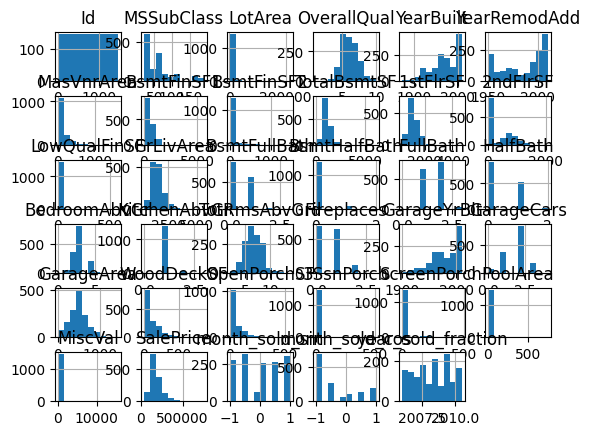

In [11]:
df.hist()

In [13]:
# one hot encoding the MiscFeature column and dropping it moving forward
one_hot_encoded = pd.get_dummies(df['MSSubClass'], prefix='MSSubClass')

df_encoded = pd.concat([df.drop('MSSubClass', axis=1), one_hot_encoded], axis=1)

df_encoded

,Id,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotArea,Street_Grvl,Street_Pave,Alley_Grvl,...,60,70,75,80,85,90,120,160,180,190
0,1,False,False,False,True,False,8450,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,2,False,False,False,True,False,9600,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,False,False,False,True,False,11250,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,4,False,False,False,True,False,9550,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,5,False,False,False,True,False,14260,False,True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,False,False,False,True,False,7917,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1456,1457,False,False,False,True,False,13175,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1457,1458,False,False,False,True,False,9042,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1458,1459,False,False,False,True,False,9717,False,True,False,...,False,False,False,False,False,False,False,False,False,False
